# Creation of Vegetation datacube

## Software requirements

Extra packages I used for my environment:
- openpyxl
- pandas
- xarray
- cartopy
- ipykernel

In [1]:
#pip install cartopy openpyxl

## Python packages

In [2]:
import pandas as pd
from pathlib import Path

import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

## Load Vegetation data

In [3]:
veg_data_url = "https://docs.google.com/spreadsheets/d/1wMIaGTr2x2zwaK8XDsY8fBEsji3TXOQD/edit?usp=sharing&ouid=111380322270284647450&rtpof=true&sd=true"
veg_data_download_url = 'https://drive.google.com/uc?id=' + veg_data_url.split('/')[-2]

veg_data_download_url

'https://drive.google.com/uc?id=1wMIaGTr2x2zwaK8XDsY8fBEsji3TXOQD'

In [4]:
station_raw = pd.read_excel(veg_data_download_url, sheet_name="STATION", skiprows=[0], header=list(range(0,4))).droplevel([1,2,3], axis = 1)
data_raw = pd.read_excel(veg_data_download_url, sheet_name="DATA", skiprows=[0,1], header=list(range(0,4))).droplevel([1,2,3], axis = 1)
taxa_raw = pd.read_excel(veg_data_download_url, sheet_name="Ref_Taxa")
cover_raw = pd.read_excel(veg_data_download_url, sheet_name="Ref_Cover_classes", header=[0,1])

### Station

In [5]:
station = station_raw[["SCODE", "eastBoundingCoordinate", "northBoundingCoordinate", "altitudeMinimum"]]
station

,SCODE,eastBoundingCoordinate,northBoundingCoordinate,altitudeMinimum
0,0001F01,14.44759,47.83903,908.5
1,0002F01,14.44998,47.83961,906.2
2,0003F01,14.45150,47.83983,894.5
3,0004F01,14.45267,47.84016,891.1
4,0005F01,14.45205,47.84122,879.9
...,...,...,...,...
162,0196F01,14.44288,47.84450,801.9
163,0197F01,14.44199,47.84413,768.5
164,0198F01,14.43909,47.84143,801.1
165,0199F01,14.43949,47.84360,659.2


### Vegetation coverage

In [6]:
data = data_raw[["SCODE", "YEAR", "MONTH", "DAY", "TAXA", "SUBST", "METHOD_CODE", "VALUE"]]
data_date = data[["YEAR", "MONTH", "DAY"]].copy() \
    .rename(columns={"YEAR":"year", "MONTH":"month", "DAY":"day"})
data.insert(data.columns.get_loc('DAY')+1, "datetime", pd.to_datetime(data_date).map(lambda x: x.strftime("%Y%m%d")))
data

,SCODE,YEAR,MONTH,DAY,datetime,TAXA,SUBST,METHOD_CODE,VALUE
0,0001F01,1993,7,15,19930715,100002,COVE_F,Br-Bl-7,2
1,0001F01,1993,7,15,19930715,100008,COVE_F,Br-Bl-7,+
2,0001F01,1993,7,15,19930715,100016,COVE_F,Br-Bl-7,+
3,0001F01,1993,7,15,19930715,100112,COVE_F,Br-Bl-7,1
4,0001F01,1993,7,15,19930715,100116,COVE_F,Br-Bl-7,+
...,...,...,...,...,...,...,...,...,...
32604,0196F01,2021,6,22,20210622,100320,COVE_F,Pfadenhauer-9,3
32605,0196F01,2021,6,22,20210622,100356,COVE_F,Pfadenhauer-9,+
32606,0196F01,2021,6,22,20210622,100358,COVE_F,Pfadenhauer-9,+
32607,0196F01,2021,6,22,20210622,100369,COVE_F,Pfadenhauer-9,+


In [7]:
taxa = taxa_raw[["Taxa_code", "Species name"]] \
    .rename(columns={"Taxa_code": "TAXA"})
taxa

gbif_species_export = taxa.copy() \
    .rename(columns = {"TAXA" : "id", "Species name" : "scientificName"})
gbif_species_export['kingdom'] = "Plantae"
gbif_species_export.to_csv(Path("./gbif_species_export.csv"), index=False)

## Load normalised data

In [8]:
gbif_data_url = "https://drive.google.com/file/d/1EOKYmSQdXCssPhFoVaYLOdG57oLXVSb-/view?usp=share_link"
gbif_data_download_url = 'https://drive.google.com/uc?id=' + gbif_data_url.split('/')[-2]
gbif_data_download_url

'https://drive.google.com/uc?id=1EOKYmSQdXCssPhFoVaYLOdG57oLXVSb-'

In [9]:
#gbif_species_normalized_raw = pd.read_csv(Path("./gbif_species_normalized.csv"))
gbif_species_normalized_raw = pd.read_csv(gbif_data_download_url)
gbif_species_normalized_raw

,occurrenceId,verbatimScientificName,scientificName,key,matchType,confidence,status,rank,kingdom,phylum,class,order,family,genus,species,canonicalName,authorship,usageKey,acceptedUsageKey
0,100001,Abies alba,Abies alba Mill.,2685484,EXACT,99,ACCEPTED,SPECIES,Plantae,Tracheophyta,Pinopsida,Pinales,Pinaceae,Abies,Abies alba,Abies alba,Mill.,2685484,NaN
1,100002,Acer pseudoplatanus,Acer pseudoplatanus L.,3189870,EXACT,99,ACCEPTED,SPECIES,Plantae,Tracheophyta,Magnoliopsida,Sapindales,Sapindaceae,Acer,Acer pseudoplatanus,Acer pseudoplatanus,L.,3189870,NaN
2,100003,Acinos alpinus,Acinos alpinus (L.) Moench,7308311,EXACT,100,SYNONYM,SPECIES,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Lamiaceae,Clinopodium,Clinopodium alpinum,Acinos alpinus,(L.) Moench,7308311,7307319.0
3,100004,Aconitum napellus,Aconitum napellus L.,3033665,EXACT,99,ACCEPTED,SPECIES,Plantae,Tracheophyta,Magnoliopsida,Ranunculales,Ranunculaceae,Aconitum,Aconitum napellus,Aconitum napellus,L.,3033665,NaN
4,100005,Aconitum vulparia,Aconitum vulparia Rchb.,3033682,EXACT,99,SYNONYM,SPECIES,Plantae,Tracheophyta,Magnoliopsida,Ranunculales,Ranunculaceae,Aconitum,Aconitum lycoctonum,Aconitum vulparia,Rchb.,3033682,3923253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,100448,Euonymus latifolius,Euonymus latifolius (L.) Mill.,7433196,EXACT,99,ACCEPTED,SPECIES,Plantae,Tracheophyta,Magnoliopsida,Celastrales,Celastraceae,Euonymus,Euonymus latifolius,Euonymus latifolius,(L.) Mill.,7433196,NaN
331,100449,Galeopsis pubescens,Galeopsis pubescens Besser,5341310,EXACT,99,ACCEPTED,SPECIES,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Lamiaceae,Galeopsis,Galeopsis pubescens,Galeopsis pubescens,Besser,5341310,NaN
332,100450,Hieracium sp.,Hieracium L.,3134951,EXACT,80,ACCEPTED,GENUS,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Hieracium,NaN,Hieracium,L.,3134951,NaN
333,100452,Aegopodium podagraria,Aegopodium podagraria L.,3034620,EXACT,100,ACCEPTED,SPECIES,Plantae,Tracheophyta,Magnoliopsida,Apiales,Apiaceae,Aegopodium,Aegopodium podagraria,Aegopodium podagraria,L.,3034620,NaN


In [10]:
# GBIF for merging
gbif_species = gbif_species_normalized_raw[['occurrenceId', "key"]] \
    .rename(columns={"occurrenceId": "TAXA", "key": "speciesKey"})
gbif_species

,TAXA,speciesKey
0,100001,2685484
1,100002,3189870
2,100003,7308311
3,100004,3033665
4,100005,3033682
...,...,...
330,100448,7433196
331,100449,5341310
332,100450,3134951
333,100452,3034620


In [11]:
# GBIF for cube? (there are duplicates -> removed)
species_export = gbif_species_normalized_raw[["key", "scientificName"]] \
    .rename({"key": "speciesKey" , "scientificName": "species"}) \
    .drop_duplicates()

species_export.to_csv(Path("./species_normalized.csv"), index=False)
species_export

,key,scientificName
0,2685484,Abies alba Mill.
1,3189870,Acer pseudoplatanus L.
2,7308311,Acinos alpinus (L.) Moench
3,3033665,Aconitum napellus L.
4,3033682,Aconitum vulparia Rchb.
...,...,...
330,7433196,Euonymus latifolius (L.) Mill.
331,5341310,Galeopsis pubescens Besser
332,3134951,Hieracium L.
333,3034620,Aegopodium podagraria L.


In [12]:
method_meta = pd.DataFrame(data = {"METHOD_CODE": ["Pfadenhauer-9","Br-Bl-7"], "description": ["adapted from Pfadenhauer et al. 1986", "Braun-Blanquet 1964"]})

cover = cover_raw.copy()
cover.columns=cover.columns.values
cover_rename_dict = {
    ("adapted from Pfadenhauer et al. 1986", "Cover code"): ("Pfadenhauer-9", "VALUE"),
    ("adapted from Pfadenhauer et al. 1986", "% cover"): ("Pfadenhauer-9", "Cover (%)"),
    ("Braun-Blanquet 1964", "Cover code"): ("Br-Bl-7", "VALUE"),
    ("Braun-Blanquet 1964", "% cover-abundance"): ("Br-Bl-7", "Cover (%)")
}
cover.rename(columns=cover_rename_dict, inplace=True)
cover.columns=pd.MultiIndex.from_tuples(cover.columns)
cover = cover.stack(0).droplevel(0, axis = 0).reset_index(names=["METHOD_CODE"]).sort_values(by=["METHOD_CODE"], ignore_index=True)
cover_missing = pd.DataFrame({"METHOD_CODE": ["Pfadenhauer-9", "Pfadenhauer-9"], "VALUE": [1,2],"Cover (%)": ["1-5","5-25"]})
cover = pd.concat([cover, cover_missing], ignore_index=True)
cover['VALUE'] = cover['VALUE'].apply(str)
cover

,METHOD_CODE,VALUE,Cover (%)
0,Br-Bl-7,r,single individuals
1,Br-Bl-7,+,<1
2,Br-Bl-7,1,1-5
3,Br-Bl-7,2,5-25
4,Br-Bl-7,3,25-50
5,Br-Bl-7,4,50-75
6,Br-Bl-7,5,75-100
7,Pfadenhauer-9,r,single individuals
8,Pfadenhauer-9,+,<1
9,Pfadenhauer-9,1a,1-3


In [13]:
vege = data.merge(station, on="SCODE", how="left") \
    .merge(gbif_species, on="TAXA", how="left") \
    .merge(cover, on=["METHOD_CODE", "VALUE"], how="left")


vege = vege.dropna()

In [14]:
vege['Cover (%)'].unique()

array(['5-25', '<1', '1-5', '50-75', 'single individuals', '1-3',
       '12,5-25', '5-12,5', '3-5', '25-50', '75-100'], dtype=object)

In [15]:
vege['Cover (%)'].isna().sum()

0

In [16]:
vege['datetime'] = pd.to_datetime(vege['datetime'].astype(str), format='%Y%m%d')

In [17]:
def cover_mean(cov):
    if cov[0] == "<":
        return 0.5
    elif cov[0] == "s":
        return 0.1
    else:
        return (float(cov.split("-")[0].replace(",", ".")) + float(cov.split("-")[1].replace(",", ".")))/2.

In [18]:
vege['CoverAVG'] = vege['Cover (%)'].apply(cover_mean)

In [19]:
vege

,SCODE,YEAR,MONTH,DAY,datetime,TAXA,SUBST,METHOD_CODE,VALUE,eastBoundingCoordinate,northBoundingCoordinate,altitudeMinimum,speciesKey,Cover (%),CoverAVG
0,0001F01,1993,7,15,1993-07-15,100002,COVE_F,Br-Bl-7,2,14.44759,47.83903,908.5,3189870,5-25,15.0
1,0001F01,1993,7,15,1993-07-15,100008,COVE_F,Br-Bl-7,+,14.44759,47.83903,908.5,3133738,<1,0.5
2,0001F01,1993,7,15,1993-07-15,100016,COVE_F,Br-Bl-7,+,14.44759,47.83903,908.5,3033263,<1,0.5
3,0001F01,1993,7,15,1993-07-15,100112,COVE_F,Br-Bl-7,1,14.44759,47.83903,908.5,3169315,1-5,3.0
4,0001F01,1993,7,15,1993-07-15,100116,COVE_F,Br-Bl-7,+,14.44759,47.83903,908.5,5420853,<1,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32604,0196F01,2021,6,22,2021-06-22,100320,COVE_F,Pfadenhauer-9,3,14.44288,47.84450,801.9,4107079,25-50,37.5
32605,0196F01,2021,6,22,2021-06-22,100356,COVE_F,Pfadenhauer-9,+,14.44288,47.84450,801.9,7298998,<1,0.5
32606,0196F01,2021,6,22,2021-06-22,100358,COVE_F,Pfadenhauer-9,+,14.44288,47.84450,801.9,2742119,<1,0.5
32607,0196F01,2021,6,22,2021-06-22,100369,COVE_F,Pfadenhauer-9,+,14.44288,47.84450,801.9,5663962,<1,0.5


In [20]:
vege = vege.rename(
    columns={"datetime": "time"})

In [21]:
vege

,SCODE,YEAR,MONTH,DAY,time,TAXA,SUBST,METHOD_CODE,VALUE,eastBoundingCoordinate,northBoundingCoordinate,altitudeMinimum,speciesKey,Cover (%),CoverAVG
0,0001F01,1993,7,15,1993-07-15,100002,COVE_F,Br-Bl-7,2,14.44759,47.83903,908.5,3189870,5-25,15.0
1,0001F01,1993,7,15,1993-07-15,100008,COVE_F,Br-Bl-7,+,14.44759,47.83903,908.5,3133738,<1,0.5
2,0001F01,1993,7,15,1993-07-15,100016,COVE_F,Br-Bl-7,+,14.44759,47.83903,908.5,3033263,<1,0.5
3,0001F01,1993,7,15,1993-07-15,100112,COVE_F,Br-Bl-7,1,14.44759,47.83903,908.5,3169315,1-5,3.0
4,0001F01,1993,7,15,1993-07-15,100116,COVE_F,Br-Bl-7,+,14.44759,47.83903,908.5,5420853,<1,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32604,0196F01,2021,6,22,2021-06-22,100320,COVE_F,Pfadenhauer-9,3,14.44288,47.84450,801.9,4107079,25-50,37.5
32605,0196F01,2021,6,22,2021-06-22,100356,COVE_F,Pfadenhauer-9,+,14.44288,47.84450,801.9,7298998,<1,0.5
32606,0196F01,2021,6,22,2021-06-22,100358,COVE_F,Pfadenhauer-9,+,14.44288,47.84450,801.9,2742119,<1,0.5
32607,0196F01,2021,6,22,2021-06-22,100369,COVE_F,Pfadenhauer-9,+,14.44288,47.84450,801.9,5663962,<1,0.5


## Save to Cube in native grid

In [22]:
dset = vege.rename(columns={"eastBoundingCoordinate": "lon", "northBoundingCoordinate": "lat"}).groupby(['time', 'lat', 'lon', 'TAXA'])[['CoverAVG']].mean().to_xarray()
dset

<xarray.Dataset>
Dimensions:   (time: 91, lat: 154, lon: 160, TAXA: 335)
Coordinates:
  * time      (time) datetime64[ns] 1993-07-15 2005-07-04 ... 2021-08-26
  * lat       (lat) float64 47.84 47.84 47.84 47.84 ... 47.85 47.85 47.85 47.85
  * lon       (lon) float64 14.44 14.44 14.44 14.44 ... 14.45 14.45 14.45 14.45
  * TAXA      (TAXA) int64 100001 100002 100003 100004 ... 100450 100452 100453
Data variables:
    CoverAVG  (time, lat, lon, TAXA) float64 nan nan nan nan ... nan nan nan nan

In [23]:
dset.to_netcdf("CoverAVG_vegetation_native.nc")

## MGRS 100m grid

In [24]:
pip install mgrs

Note: you may need to restart the kernel to use updated packages.


In [25]:
import mgrs

In [26]:
# Define a custom function to combine columns
# Precision	Size of grid side
# 5	1m
# 4	10m
# 3	100m
# 2	1000m (1km)
# 1	10000m (10km)
# 0	100000m (100km)
def to_mgrs_compute(row):
    return mgrs.MGRS().toMGRS(row['northBoundingCoordinate'], row['eastBoundingCoordinate'],4)

In [27]:
# Define a custom function to combine columns
def from_mgrs_compute_lat(row):
    return mgrs.MGRS().toLatLon(row['MGRS'])[0]
# Define a custom function to combine columns
def from_mgrs_compute_lon(row):
    return mgrs.MGRS().toLatLon(row['MGRS'])[1]

In [28]:
# Apply the custom function to create a new column 'MGRS'
vege['MGRS'] = vege.apply(to_mgrs_compute, axis=1)

In [29]:
vege['lon'] = vege.apply(from_mgrs_compute_lon, axis=1)
vege['lat'] = vege.apply(from_mgrs_compute_lat, axis=1)

In [30]:
vege

,SCODE,YEAR,MONTH,DAY,time,TAXA,SUBST,METHOD_CODE,VALUE,eastBoundingCoordinate,northBoundingCoordinate,altitudeMinimum,speciesKey,Cover (%),CoverAVG,MGRS,lon,lat
0,0001F01,1993,7,15,1993-07-15,100002,COVE_F,Br-Bl-7,2,14.44759,47.83903,908.5,3189870,5-25,15.0,33TVN5866498557,14.447580,47.839030
1,0001F01,1993,7,15,1993-07-15,100008,COVE_F,Br-Bl-7,+,14.44759,47.83903,908.5,3133738,<1,0.5,33TVN5866498557,14.447580,47.839030
2,0001F01,1993,7,15,1993-07-15,100016,COVE_F,Br-Bl-7,+,14.44759,47.83903,908.5,3033263,<1,0.5,33TVN5866498557,14.447580,47.839030
3,0001F01,1993,7,15,1993-07-15,100112,COVE_F,Br-Bl-7,1,14.44759,47.83903,908.5,3169315,1-5,3.0,33TVN5866498557,14.447580,47.839030
4,0001F01,1993,7,15,1993-07-15,100116,COVE_F,Br-Bl-7,+,14.44759,47.83903,908.5,5420853,<1,0.5,33TVN5866498557,14.447580,47.839030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32604,0196F01,2021,6,22,2021-06-22,100320,COVE_F,Pfadenhauer-9,3,14.44288,47.84450,801.9,4107079,25-50,37.5,33TVN5831699167,14.442871,47.844495
32605,0196F01,2021,6,22,2021-06-22,100356,COVE_F,Pfadenhauer-9,+,14.44288,47.84450,801.9,7298998,<1,0.5,33TVN5831699167,14.442871,47.844495
32606,0196F01,2021,6,22,2021-06-22,100358,COVE_F,Pfadenhauer-9,+,14.44288,47.84450,801.9,2742119,<1,0.5,33TVN5831699167,14.442871,47.844495
32607,0196F01,2021,6,22,2021-06-22,100369,COVE_F,Pfadenhauer-9,+,14.44288,47.84450,801.9,5663962,<1,0.5,33TVN5831699167,14.442871,47.844495


## Convert to Xarray to get datacube

In [31]:
dset = vege.groupby(['time', 'lat', 'lon', 'TAXA'])[['CoverAVG']].mean().to_xarray()

In [32]:
dset

<xarray.Dataset>
Dimensions:   (time: 91, lat: 167, lon: 167, TAXA: 335)
Coordinates:
  * time      (time) datetime64[ns] 1993-07-15 2005-07-04 ... 2021-08-26
  * lat       (lat) float64 47.84 47.84 47.84 47.84 ... 47.85 47.85 47.85 47.85
  * lon       (lon) float64 14.44 14.44 14.44 14.44 ... 14.45 14.45 14.45 14.45
  * TAXA      (TAXA) int64 100001 100002 100003 100004 ... 100450 100452 100453
Data variables:
    CoverAVG  (time, lat, lon, TAXA) float64 nan nan nan nan ... nan nan nan nan

## Save into netcdf to keep the datacube "small"

In [33]:
dset.to_netcdf("CoverAVG_vegetation_MGRS100m.nc")

In [34]:
import xarray as xr

In [35]:
dset = xr.open_dataset("CoverAVG_vegetation_MGRS100m.nc")

### Example to plot TAXA=1000001 
- Compute yearly mean 

In [36]:
from matplotlib import pyplot as plt

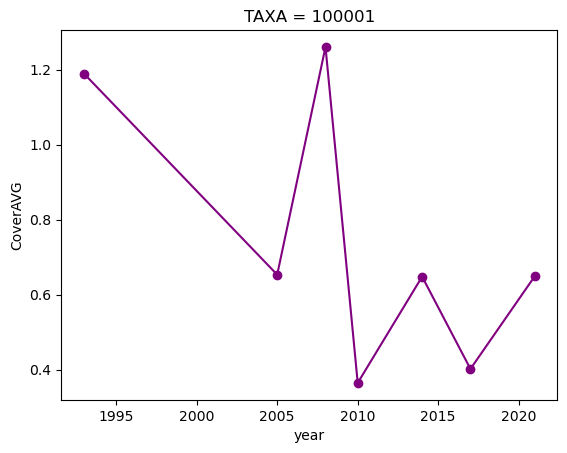

In [37]:
dset.isel(TAXA=0)["CoverAVG"].mean(dim=["lat", "lon"]).groupby('time.year').mean().plot(color="purple", marker="o")

plt.savefig('CoverAVG_TAXA_100001.png')

In [38]:
df = dset.isel(TAXA=0).mean("time").to_dataframe().reset_index()

In [39]:
df

,lat,lon,TAXA,CoverAVG
0,47.838383,14.436387,100001,NaN
1,47.838383,14.436451,100001,NaN
2,47.838383,14.436765,100001,NaN
3,47.838383,14.436835,100001,NaN
4,47.838383,14.436887,100001,NaN
...,...,...,...,...
27884,47.847344,14.451488,100001,NaN
27885,47.847344,14.451802,100001,NaN
27886,47.847344,14.452047,100001,NaN
27887,47.847344,14.452660,100001,NaN


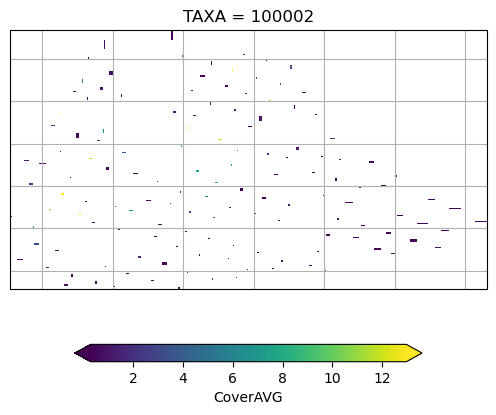

In [40]:
fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

dset.isel(TAXA=1).mean("time")["CoverAVG"].plot(
    ax=axis,
    transform=ccrs.PlateCarree(),  # this is important!
    # usual xarray stuff
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
    robust=True,
)
# [west, east, south, north]
#axis.set_extent([14, 15, 47, 48])
axis.coastlines()  # cartopy function
axis.gridlines()
plt.savefig('CoverAVG_lat_lon_TAXA_100001.png')